In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
frame_df = pd.read_csv('../outputs/counts_per_frame_video_1.csv')
frame_df['Density'] = frame_df['Vehicles'] / 0.092
frame_df.head()

,Frame,Vehicles,Density
0,0,11,119.565217
1,4,11,119.565217
2,8,11,119.565217
3,12,11,119.565217
4,16,11,119.565217


In [3]:
second_df = frame_df.copy()
second_df['Seconds'] = second_df['Frame'] / 15
second_df = second_df.drop(columns=['Frame'])
second_df.head()

,Vehicles,Density,Seconds
0,11,119.565217,0.000000
1,11,119.565217,0.266667
2,11,119.565217,0.533333
3,11,119.565217,0.800000
4,11,119.565217,1.066667


In [4]:
second_df['Time'] = pd.to_timedelta(second_df['Seconds'], unit='s')
second_df = second_df.set_index('Time')
second_df.head()

,Vehicles,Density,Seconds
Time,,,
0 days 00:00:00,11,119.565217,0.000000
0 days 00:00:00.266666667,11,119.565217,0.266667
0 days 00:00:00.533333332,11,119.565217,0.533333
0 days 00:00:00.800000,11,119.565217,0.800000
0 days 00:00:01.066666667,11,119.565217,1.066667


In [5]:
resample_df = second_df.resample('1s').agg({'Vehicles': 'sum', 'Density': 'mean'}).reset_index()
resample_df.head()

,Time,Vehicles,Density
0,0 days 00:00:00,44,119.565217
1,0 days 00:00:01,46,125.000000
2,0 days 00:00:02,48,130.434783
3,0 days 00:00:03,36,130.434783
4,0 days 00:00:04,48,130.434783


In [6]:
resample_df['Flow'] = resample_df['Vehicles'] * 3600
resample_df.head()

,Time,Vehicles,Density,Flow
0,0 days 00:00:00,44,119.565217,158400
1,0 days 00:00:01,46,125.000000,165600
2,0 days 00:00:02,48,130.434783,172800
3,0 days 00:00:03,36,130.434783,129600
4,0 days 00:00:04,48,130.434783,172800


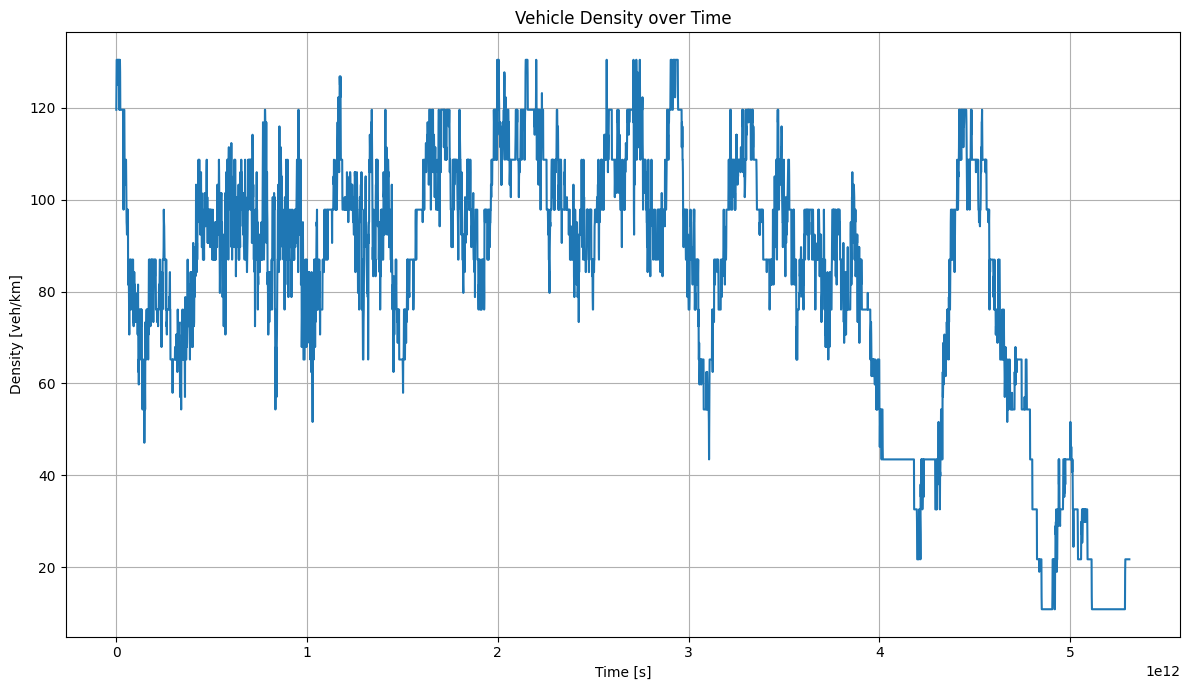

In [20]:
fig = plt.figure(figsize=(12, 7))
plt.plot(resample_df['Time'], resample_df['Density'])
plt.xlabel('Time [s]')
plt.ylabel('Density [veh/km]')
plt.title('Vehicle Density over Time')
plt.grid()
plt.tight_layout()
plt.show()

In [7]:
resample_df.describe()

,Time,Vehicles,Density,Flow
count,5311,5311.000000,5311.000000,5311.000000
mean,0 days 00:44:15,28.732254,83.293765,103436.113726
std,0 days 00:25:33.297970606,10.501128,28.730563,37804.059989
min,0 days 00:00:00,2.000000,10.869565,7200.000000
25%,0 days 00:22:07.500000,24.000000,70.652174,86400.000000
50%,0 days 00:44:15,31.000000,89.673913,111600.000000
75%,0 days 01:06:22.500000,36.000000,103.260870,129600.000000
max,0 days 01:28:30,48.000000,130.434783,172800.000000


In [15]:
track_frame_df = pd.read_csv('../outputs/tracks_per_frame_video_1.csv')
track_frame_df.head()

,x_min,y_min,x_max,y_max,class_id,confidence,tracker_id,class_name,frame
0,790.59760,2746.2202,898.39400,2932.2283,3,0.884113,1,car,0
1,856.88855,2256.9521,941.76820,2432.8660,3,0.865016,2,car,0
2,887.52340,1336.1301,949.79535,1448.0995,3,0.848497,3,car,0
3,890.85913,2050.5806,959.96130,2189.1210,3,0.846703,4,car,0
4,809.41113,2482.8027,907.45420,2671.3380,3,0.845356,5,car,0


In [16]:
track_time_df = track_frame_df.copy()
track_time_df['second'] = track_time_df['frame'] / 15
track_time_df.head()

,x_min,y_min,x_max,y_max,class_id,confidence,tracker_id,class_name,frame,second
0,790.59760,2746.2202,898.39400,2932.2283,3,0.884113,1,car,0,0.0
1,856.88855,2256.9521,941.76820,2432.8660,3,0.865016,2,car,0,0.0
2,887.52340,1336.1301,949.79535,1448.0995,3,0.848497,3,car,0,0.0
3,890.85913,2050.5806,959.96130,2189.1210,3,0.846703,4,car,0,0.0
4,809.41113,2482.8027,907.45420,2671.3380,3,0.845356,5,car,0,0.0


In [17]:
track_time_df['time'] = pd.to_timedelta(track_time_df['second'], unit='s')
track_time_df.head()

,x_min,y_min,x_max,y_max,class_id,confidence,tracker_id,class_name,frame,second,time
0,790.59760,2746.2202,898.39400,2932.2283,3,0.884113,1,car,0,0.0,0 days
1,856.88855,2256.9521,941.76820,2432.8660,3,0.865016,2,car,0,0.0,0 days
2,887.52340,1336.1301,949.79535,1448.0995,3,0.848497,3,car,0,0.0,0 days
3,890.85913,2050.5806,959.96130,2189.1210,3,0.846703,4,car,0,0.0,0 days
4,809.41113,2482.8027,907.45420,2671.3380,3,0.845356,5,car,0,0.0,0 days
